Things dataset from:
Link: martin-hebart.com/things_database/images.zip
user: researcher
PW: things4all

In [9]:
import matplotlib.pyplot as plt
import os
import torchvision.transforms as T
import numpy as np
import cv2
#from keras.preprocessing import image
from PIL import Image, ImageOps

In [10]:
dataSetRoot = "./imagesThings"
outLinesRoot = "./outlinesThingsSmaller"

In [11]:
if not os.path.exists(outLinesRoot):
    os.makedirs(outLinesRoot)

In [12]:
thingsSubfolders = os.listdir(dataSetRoot)

for thingsSubfolder in thingsSubfolders:
    if(thingsSubfolder=='._.DS_Store'):
        continue
    pictures = os.listdir(os.path.join(dataSetRoot, thingsSubfolder))
    if not os.path.exists(os.path.join(outLinesRoot, thingsSubfolder)):
        os.makedirs(os.path.join(outLinesRoot, thingsSubfolder))
    for picture in pictures:
        img = Image.open(os.path.join(dataSetRoot, thingsSubfolder, picture))
        img = img.resize((50,50))
        img = ImageOps.grayscale(img)
        #Draw outline
        gray = np.asarray(img)#cv2.imread(img.convert("RGB") , cv2.IMREAD_GRAYSCALE)

        # threshold
        #thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)[1]

        # morphology edgeout = dilated_mask - mask
        # morphology dilate
        #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
        #dilate = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

        # get absolute difference between dilate and thresh
        #diff = cv2.absdiff(dilate, thresh)

        # invert
        #edges = diff#255 - diff        
        
        high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        lowThresh = 0.5*high_thresh
        edges = cv2.Canny(gray,lowThresh,high_thresh)
        back2rgb = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
        Image.fromarray(back2rgb).save(os.path.join(outLinesRoot, thingsSubfolder, picture))
        

In [26]:
thingsSubfolder

'._.DS_Store'

In [8]:
img = Image.open(os.path.join(dataSetRoot, "rabbit", "rabbit_10n.jpg"))
img.resize((256,256))
img = ImageOps.grayscale(img)

In [9]:
gray = np.asarray(img)#cv2.imread(img.convert("RGB") , cv2.IMREAD_GRAYSCALE)

In [14]:
back2rgb = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)

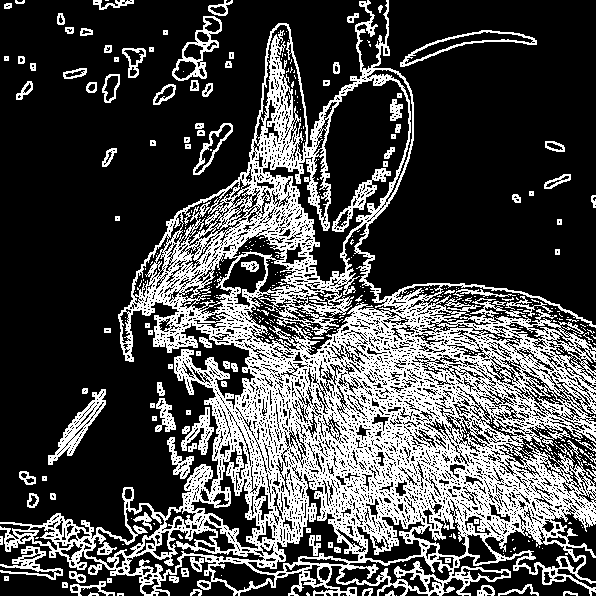

In [15]:
Image.fromarray(back2rgb)